## Stationary 10-armed bandit

This demonstrates the efficacy of two different types of agents in a multi-armed bandit environment.



In [1]:
from nbandit.agent import EpsilonGreedySampleAveragesAgent, SoftmaxAgent
from nbandit.bandit import generate_bandit

In [2]:
from matplotlib import pyplot as plt

In [3]:
import numpy
def get_average_of_runs(runs):
    return numpy.average(runs, 0)

def get_optimal_reward(bandit):
    optimal_reward = max(list(map(lambda lever: lever[0](), bandit)))
    return optimal_reward

In [9]:
n = 10

def plot_optimality_of_agent(agent, bandit_function, refresh_reward_every_step=False, run_count=2000):

    runs = []
    for run in range(run_count):
        bandit = bandit_function(n)
        optimal_reward = get_optimal_reward(bandit)

        rewards = []

        total_rewards = 0
        total_optimal_rewards = 0

        for step in range(1, 2000):
            reward, action = agent.step(bandit)
            total_rewards += reward
            
            if refresh_reward_every_step:
                optimal_reward = get_optimal_reward(bandit)
            total_optimal_rewards += optimal_reward
            if optimal_reward == 0:
                rewards.append(1.0)
            else:
                rewards.append(total_rewards / total_optimal_rewards)
        
        runs.append(rewards)

    plt.plot(get_average_of_runs(runs))
    plt.ylabel("% of optimal reward")
    plt.show()


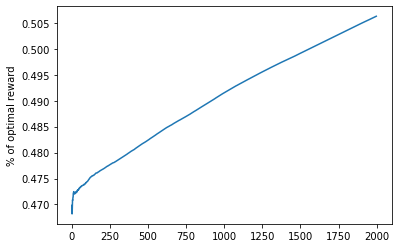

In [12]:
agent = EpsilonGreedySampleAveragesAgent(n, 0.01)
plot_optimality_of_agent(agent, generate_bandit)

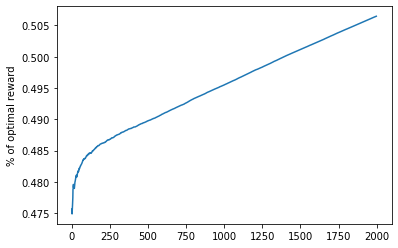

In [13]:
agent = EpsilonGreedySampleAveragesAgent(n, 0.1)
plot_optimality_of_agent(agent, generate_bandit)

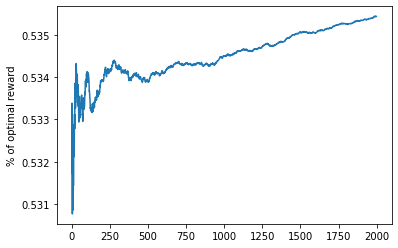

In [50]:
agent = SoftmaxAgent(n)
plot_optimality_of_agent(agent, generate_bandit)

## Nonstationary 10 armed bandit


In [5]:
from nbandit.bandit import generate_nonstationary_bandit

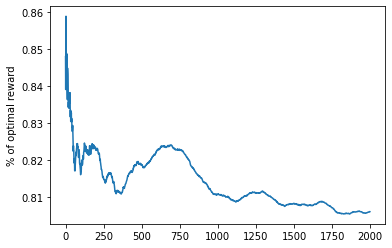

In [10]:
agent = SoftmaxAgent(n)
plot_optimality_of_agent(agent, generate_nonstationary_bandit, True, 10)

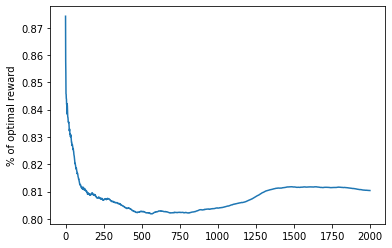

In [11]:
agent = EpsilonGreedySampleAveragesAgent(n, 0.01)
plot_optimality_of_agent(agent, generate_nonstationary_bandit, True, 100)

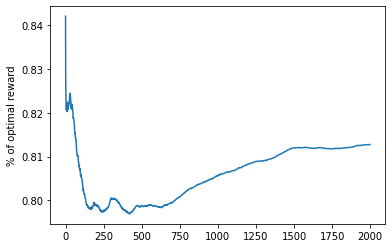

In [14]:
agent = EpsilonGreedySampleAveragesAgent(n, 0.1)
plot_optimality_of_agent(agent, generate_nonstationary_bandit, True, 100)